## Exploratory Data Analysis

In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# statsmodels library
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# sklearn library
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# displays floats with 2 decimal points
pd.options.display.float_format = '{:.2f}'.format

In [2]:
# load in dataset
df = pd.read_csv('./data/cleaned_kchd.csv', index_col=0, parse_dates=['date'])

### First look at the data

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,logged_price
0,7399300360,2022-05-24,675000,4,1.00,1180,7140,1.00,0,NO,...,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.46,-122.19,13.42
1,8910500230,2021-12-13,920000,5,2.50,2770,6703,1.00,0,NO,...,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.71,-122.36,13.73
2,1180000275,2021-09-29,311000,6,2.00,2880,6156,1.00,0,NO,...,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.50,-122.23,12.65
3,1604601802,2021-12-14,775000,3,3.00,2160,1400,2.00,0,NO,...,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.57,-122.29,13.56
4,8562780790,2021-08-24,592500,2,2.00,1120,758,2.00,0,NO,...,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.53,-122.07,13.29


In [4]:
df.iloc[:,:13].head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition
0,7399300360,2022-05-24,675000,4,1.00,1180,7140,1.00,0,NO,NO,NONE,Good
1,8910500230,2021-12-13,920000,5,2.50,2770,6703,1.00,0,NO,YES,AVERAGE,Average
2,1180000275,2021-09-29,311000,6,2.00,2880,6156,1.00,0,NO,NO,AVERAGE,Average
3,1604601802,2021-12-14,775000,3,3.00,2160,1400,2.00,0,NO,NO,AVERAGE,Average
4,8562780790,2021-08-24,592500,2,2.00,1120,758,2.00,0,NO,YES,NONE,Average


In [5]:
df.iloc[:,12:].head()

,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,logged_price
0,Good,7 Average,Gas,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.46,-122.19,13.42
1,Average,7 Average,Oil,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.71,-122.36,13.73
2,Average,7 Average,Gas,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.50,-122.23,12.65
3,Average,9 Better,Gas,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.57,-122.29,13.56
4,Average,7 Average,Electricity,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.53,-122.07,13.29


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30155 entries, 0 to 30154
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             30155 non-null  int64         
 1   date           30155 non-null  datetime64[ns]
 2   price          30155 non-null  int64         
 3   bedrooms       30155 non-null  int64         
 4   bathrooms      30155 non-null  float64       
 5   sqft_living    30155 non-null  int64         
 6   sqft_lot       30155 non-null  int64         
 7   floors         30155 non-null  float64       
 8   waterfront     30155 non-null  int64         
 9   greenbelt      30155 non-null  object        
 10  nuisance       30155 non-null  object        
 11  view           30155 non-null  object        
 12  condition      30155 non-null  object        
 13  grade          30155 non-null  object        
 14  heat_source    30123 non-null  object        
 15  sewer_system   3014

In [7]:
df.isna().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
logged_price      0
dtype: int64

Drop null values from heat source and sewer system

In [8]:
df.dropna(subset=['heat_source', 'sewer_system'], inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             30111 non-null  int64         
 1   date           30111 non-null  datetime64[ns]
 2   price          30111 non-null  int64         
 3   bedrooms       30111 non-null  int64         
 4   bathrooms      30111 non-null  float64       
 5   sqft_living    30111 non-null  int64         
 6   sqft_lot       30111 non-null  int64         
 7   floors         30111 non-null  float64       
 8   waterfront     30111 non-null  int64         
 9   greenbelt      30111 non-null  object        
 10  nuisance       30111 non-null  object        
 11  view           30111 non-null  object        
 12  condition      30111 non-null  object        
 13  grade          30111 non-null  object        
 14  heat_source    30111 non-null  object        
 15  sewer_system   3011

In [10]:
df['waterfront'].value_counts()

0    29590
1      521
Name: waterfront, dtype: int64

In [11]:
df['view'].value_counts()

NONE         26555
AVERAGE       1910
GOOD           877
EXCELLENT      549
FAIR           220
Name: view, dtype: int64

In [12]:
df['yr_renovated'].value_counts()

0       28743
2021       69
2006       49
2018       44
1990       42
        ...  
1924        1
1972        1
1948        1
1942        1
1966        1
Name: yr_renovated, Length: 82, dtype: int64

It's possible a 0 value for yr_renovated means it has not been renovated. This could be useful in our model to see if a renovation has had a significant impact on the house price.

In [13]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,logged_price
count,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00
mean,4539171422.40,1108970.65,3.42,2.34,2113.34,16648.80,1.54,0.02,1810.39,476.62,330.48,217.45,1975.16,90.79,47.33,-121.32,13.74
std,2882235761.32,896515.83,0.98,0.89,973.45,59933.03,0.57,0.13,877.73,579.81,285.73,245.30,32.05,416.20,1.43,5.72,0.58
min,1000055.00,27360.00,0.00,0.00,3.00,402.00,1.00,0.00,2.00,0.00,0.00,0.00,1900.00,0.00,21.27,-157.79,10.22
25%,2070850032.50,649236.00,3.00,2.00,1420.00,4850.00,1.00,0.00,1180.00,0.00,0.00,40.00,1953.00,0.00,47.41,-122.33,13.38
50%,3876000200.00,860000.00,3.00,2.50,1920.00,7477.00,1.50,0.00,1560.00,0.00,400.00,150.00,1977.00,0.00,47.55,-122.23,13.66
75%,7287100141.00,1300000.00,4.00,3.00,2620.00,10568.00,2.00,0.00,2270.00,940.00,510.00,320.00,2003.00,0.00,47.67,-122.12,14.08
max,9904000012.00,30750000.00,13.00,10.50,15360.00,3253932.00,4.00,1.00,12660.00,8020.00,3580.00,4370.00,2022.00,2022.00,64.82,-70.07,17.24


### Assigning Numbers to Categorical Columns

condition, view, and grade we can assign number values to. This will help with sorting and our regression later on. We are also going to convert yr_renovated into a YES or NO column. So if a house was renovated it will be YES if not it will say NO.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             30111 non-null  int64         
 1   date           30111 non-null  datetime64[ns]
 2   price          30111 non-null  int64         
 3   bedrooms       30111 non-null  int64         
 4   bathrooms      30111 non-null  float64       
 5   sqft_living    30111 non-null  int64         
 6   sqft_lot       30111 non-null  int64         
 7   floors         30111 non-null  float64       
 8   waterfront     30111 non-null  int64         
 9   greenbelt      30111 non-null  object        
 10  nuisance       30111 non-null  object        
 11  view           30111 non-null  object        
 12  condition      30111 non-null  object        
 13  grade          30111 non-null  object        
 14  heat_source    30111 non-null  object        
 15  sewer_system   3011

In [15]:
# taking a look at grade
df.grade.value_counts()

7 Average        11693
8 Good            9400
9 Better          3804
6 Low Average     2852
10 Very Good      1369
11 Excellent       406
5 Fair             385
12 Luxury          122
4 Low               46
13 Mansion          24
3 Poor               9
2 Substandard        1
Name: grade, dtype: int64

In [16]:
# split grade into a list and assign the first value
# to the grade_num column
df['grade_num'] = df['grade'].str.split().str[0].astype(int)

In [17]:
# take a look at grade_num column
df['grade_num']

0        7
1        7
2        7
3        9
4        7
        ..
30150    8
30151    7
30152    7
30153    8
30154    7
Name: grade_num, Length: 30111, dtype: int32

In [18]:
# check out the final input
df[['grade', 'grade_num']].head(10)

,grade,grade_num
0,7 Average,7
1,7 Average,7
2,7 Average,7
3,9 Better,9
4,7 Average,7
5,7 Average,7
6,9 Better,9
7,8 Good,8
8,8 Good,8
9,8 Good,8


Assigning a number value to grade was successful now assign value to condition.

In [19]:
# taking a look at condition
df.condition.value_counts()

Average      18515
Good          8052
Very Good     3258
Fair           225
Poor            61
Name: condition, dtype: int64

The order for condition it POOR, FAIR, AVERAGE, GOOD, VERY GOOD

In [20]:
# create a dictionary to assign numbers to the values
condition_dict = {
    "Poor": 1,
    "Fair": 2,
    "Average": 3,
    "Good": 4,
    "Very Good": 5
}

In [21]:
# take a look at condition column
df['condition']

0           Good
1        Average
2        Average
3        Average
4        Average
          ...   
30150       Good
30151    Average
30152    Average
30153    Average
30154    Average
Name: condition, Length: 30111, dtype: object

In [22]:
# create new column and assign to the map of condition using
# the dictionary we created
df['condition_num'] = df['condition'].map(condition_dict)

In [23]:
# check to see if it worked
df[['condition','condition_num']]

,condition,condition_num
0,Good,4
1,Average,3
2,Average,3
3,Average,3
4,Average,3
...,...,...
30150,Good,4
30151,Average,3
30152,Average,3
30153,Average,3


Condition column was assigned a numeric value now it is time to convert view to a numeric value

In [24]:
# taking a look at view
df.view.value_counts()

NONE         26555
AVERAGE       1910
GOOD           877
EXCELLENT      549
FAIR           220
Name: view, dtype: int64

In [25]:
# create a dictionary for the view values
view_dict = {
    "NONE": 1,
    "FAIR": 2,
    "AVERAGE": 3,
    "GOOD": 4,
    "EXCELLENT": 5
}

In [26]:
# creating a new view_num column with the values from dict
df['view_num'] = df['view'].map(view_dict)

In [27]:
# check to see if it worked
df[['view', 'view_num']].loc[df['view'] != "NONE"]

,view,view_num
1,AVERAGE,3
2,AVERAGE,3
3,AVERAGE,3
6,AVERAGE,3
9,AVERAGE,3
...,...,...
30098,FAIR,2
30114,AVERAGE,3
30120,AVERAGE,3
30145,AVERAGE,3


Now it is time to convert yr_renovated into a YES or NO column if the home was renovated after 2009

In [28]:
df['yr_renovated_yes_or_no'] = df['yr_renovated'].map(lambda x: 1 if x >= 2010 else 0)

In [29]:
df[['yr_renovated', 'yr_renovated_yes_or_no']].loc[df['yr_renovated'] != 0]

,yr_renovated,yr_renovated_yes_or_no
24,2005,0
36,1995,0
40,2008,0
42,1978,0
51,2015,1
...,...,...
30084,1993,0
30094,2016,1
30105,1988,0
30107,1967,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      30111 non-null  int64         
 1   date                    30111 non-null  datetime64[ns]
 2   price                   30111 non-null  int64         
 3   bedrooms                30111 non-null  int64         
 4   bathrooms               30111 non-null  float64       
 5   sqft_living             30111 non-null  int64         
 6   sqft_lot                30111 non-null  int64         
 7   floors                  30111 non-null  float64       
 8   waterfront              30111 non-null  int64         
 9   greenbelt               30111 non-null  object        
 10  nuisance                30111 non-null  object        
 11  view                    30111 non-null  object        
 12  condition               30111 non-null  object

### Extracting zipcode from address

In [31]:
df['address'].iloc[4]

'2193 Northwest Talus Drive, Issaquah, Washington 98027, United States'

In [32]:
# take the 5 numbers for the zipcode
df['zipcode'] = df.address.str[-20:-15]

In [33]:
df['zipcode'].unique()

array(['98055', '98133', '98178', '98118', '98027', '98166', '98030',
       '98023', '98019', '98144', '98031', '68106', '98092', '98103',
       '98006', '98136', '98007', '98038', '98057', '98077', '98126',
       '98053', '98039', '98107', '98008', '98155', '98168', '98199',
       '98004', '98045', '98052', '98011', '98002', '98033', '98116',
       '08360', '98198', '98125', '98001', '62859', '98112', '98034',
       '98056', '98059', '98005', '98040', '98014', '98106', '98029',
       '98122', '98003', '98117', '98042', '98119', '98065', '98022',
       '98072', '98058', '98108', '98115', '98074', '98105', '98024',
       '07087', '98146', '11704', '68123', '98109', '98102', '52405',
       '02066', '80501', '91343', '19131', '98028', '98188', '55417',
       '98177', '98075', '98010', '98148', '53158', '98047', '15120',
       '98032', '97210', '98070', '11105', '91730', '68410', '58490',
       '68048', '62703', '68601', '61108', '96816', '47060', '48503',
       '55901', '117

A problem here is there are many zipcodes contained in the dataset that do not belong in King County, Washington. We have to filter out the zipcodes not belonging to King County. We searched the internet to find all the zipcodes for King County and created an Excel spreadsheet containing all the zipcodes. We will use this to filter our data frame.

In [34]:
# example of an address in our dataframe containing Washington
df.loc[df['address'].str.contains(', Washington')]['address'].iloc[0]

'2102 Southeast 21st Court, Renton, Washington 98055, United States'

In [35]:
# example of an address in our dataframe containing Washington
# and zipcode starts with 98
df.loc[df['address'].str.contains('Washington 98')]['zipcode']\
.value_counts()

98042    992
98038    857
98103    761
98115    760
98117    748
        ... 
98663      2
98296      1
98387      1
98422      1
98270      1
Name: zipcode, Length: 88, dtype: int64

Load in Excel file containing King County zipcodes

In [36]:
# load excel file for King County zipcodes
zipcodes = pd.read_excel('./data/kc_zipcodes.xlsx')
zipcodes.zipcode.astype(str)

0      98001
1      98002
2      98003
3      98004
4      98005
       ...  
115    98195
116    98198
117    98199
118    98224
119    98288
Name: zipcode, Length: 120, dtype: object

In [37]:
# create a list of the zipcodes we need
zipcode_list = zipcodes.zipcode.astype(str)
zipcode_list

0      98001
1      98002
2      98003
3      98004
4      98005
       ...  
115    98195
116    98198
117    98199
118    98224
119    98288
Name: zipcode, Length: 120, dtype: object

In [38]:
# filter df by king county zipcodes and save the new df
df = df.loc[df['zipcode'].isin(zipcode_list)].copy()

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29149 entries, 0 to 30154
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      29149 non-null  int64         
 1   date                    29149 non-null  datetime64[ns]
 2   price                   29149 non-null  int64         
 3   bedrooms                29149 non-null  int64         
 4   bathrooms               29149 non-null  float64       
 5   sqft_living             29149 non-null  int64         
 6   sqft_lot                29149 non-null  int64         
 7   floors                  29149 non-null  float64       
 8   waterfront              29149 non-null  int64         
 9   greenbelt               29149 non-null  object        
 10  nuisance                29149 non-null  object        
 11  view                    29149 non-null  object        
 12  condition               29149 non-null  object

### Additional Columns

Creating a new column price_per_sqft = price / sqft_living

In [40]:
df['price_per_sqft'] = df['price'] / df['sqft_living']

## Exploratory Data Analysis

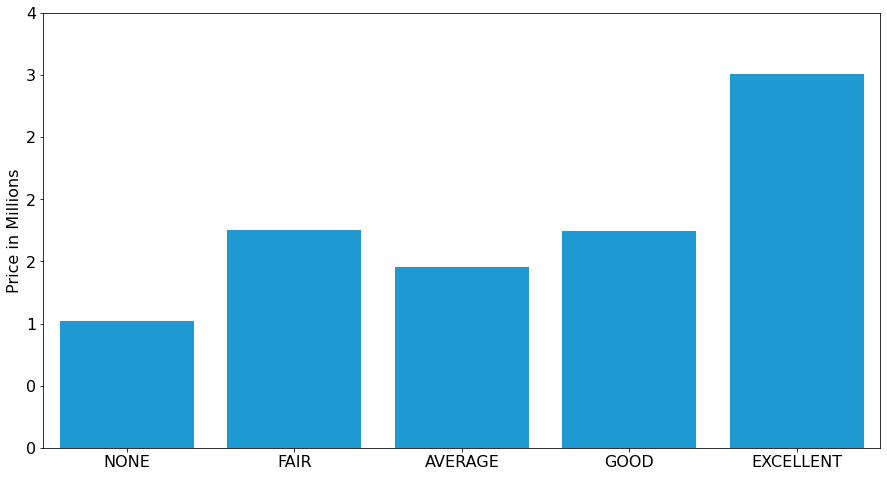

In [41]:
# Bar plot for average price by view
view_price = df[['price','view', 'view_num']].groupby(by='view')\
.mean().sort_values(by='view_num')

# set fig and ax
fig, ax = plt.subplots(figsize=(15,8))

# bar plot
sns.barplot(data=view_price.reset_index(), x='view', y='price', ax=ax, color='#00A4EF')

# This changes the tick labels to show in millions (ex. 50,000,000 -> 50) 
y_tick_labels = ['{:,.0f}'.format(x) for x in ax.get_yticks()/1000000]
ax.set_yticks(ax.get_yticks().tolist())
ax.set_yticklabels(y_tick_labels);

# x and y labels
ax.set_xlabel("")
ax.set_ylabel("Price in Millions", fontsize=16)

# size of labels
ax.tick_params(axis='both', which='major', labelsize=16)
plt.savefig('./vis/' + 'viewtoprice', bbox_inches='tight');

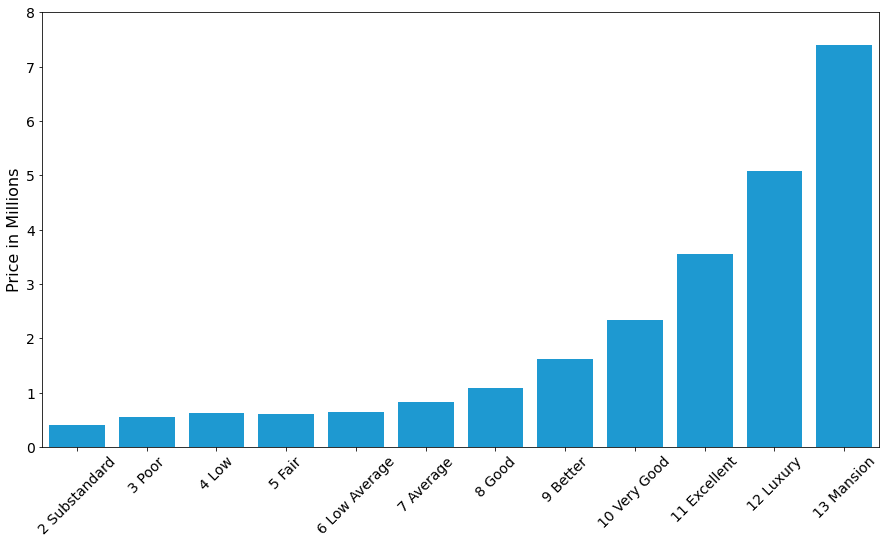

In [42]:
# Bar plot for average price by grade
grade_price = df[['price','grade', 'grade_num']]\
.groupby(by='grade').mean().sort_values(by='grade_num').reset_index()

fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(data=grade_price, x='grade', y='price', ax=ax, color='#00A4EF')

# This changes the tick labels to show in millions (ex. 50,000,000 -> 50) 
y_tick_labels = ['{:,.0f}'.format(x) for x in ax.get_yticks()/1000000]
ax.set_yticks(ax.get_yticks().tolist())
ax.set_yticklabels(y_tick_labels)

# x and y labels
ax.set_xlabel("")
ax.set_ylabel("Price in Millions", fontsize=16)

# size of labels
ax.tick_params(axis='x', which='major', labelsize=14, rotation = 45)
ax.tick_params(axis='y', which='major', labelsize=14);
plt.savefig('./vis/' + 'gradetoprice', bbox_inches='tight');

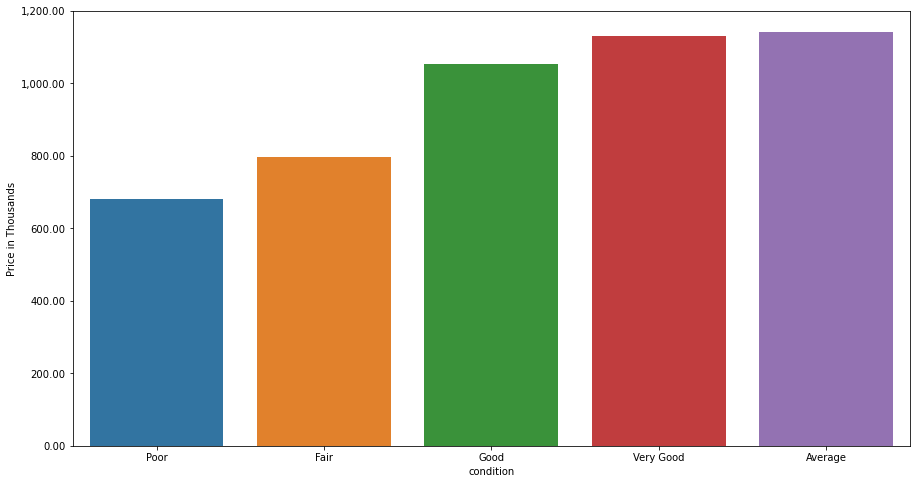

In [43]:
# Bar plot for average price by condition
condition_price = df[['price','condition']].groupby(by='condition')\
.mean().sort_values(by='price').reset_index()

fig, ax = plt.subplots(figsize=(15,8))

sns.barplot(data=condition_price, x='condition', y='price', ax=ax)

# This changes the tick labels to show in thousands (ex. 500,000 -> 500) 
y_tick_labels = ['{:,.2f}'.format(x) for x in ax.get_yticks()/1000]
ax.set_yticks(ax.get_yticks().tolist())
ax.set_yticklabels(y_tick_labels);

# set y label
ax.set_ylabel('Price in Thousands')
plt.savefig('./vis/' + 'conditiontoprice', bbox_inches='tight');

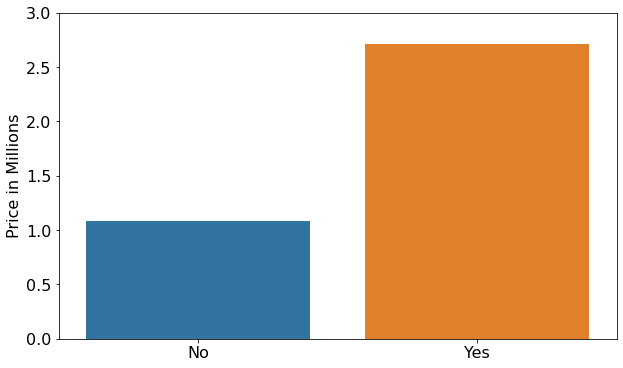

In [44]:
# Bar plot for average price by waterfront properties
waterfront_price = df[['price','waterfront']].groupby(by='waterfront')\
.mean().sort_values(by='price').reset_index()

fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(data=waterfront_price, x='waterfront', y='price', ax=ax)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)

# This changes the tick labels to show in millions (ex. 50,000,000 -> 50) 
y_tick_labels = ['{:,.1f}'.format(x) for x in ax.get_yticks()/1000000]
ax.set_yticks(ax.get_yticks().tolist())
ax.set_yticklabels(y_tick_labels)

# set a tick labels
ax.set_xticklabels(['No', 'Yes'])

# x and y labels
ax.set_xlabel("")
ax.set_ylabel("Price in Millions", fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16);
plt.savefig('./vis/' + 'waterfronttoprice', bbox_inches='tight');

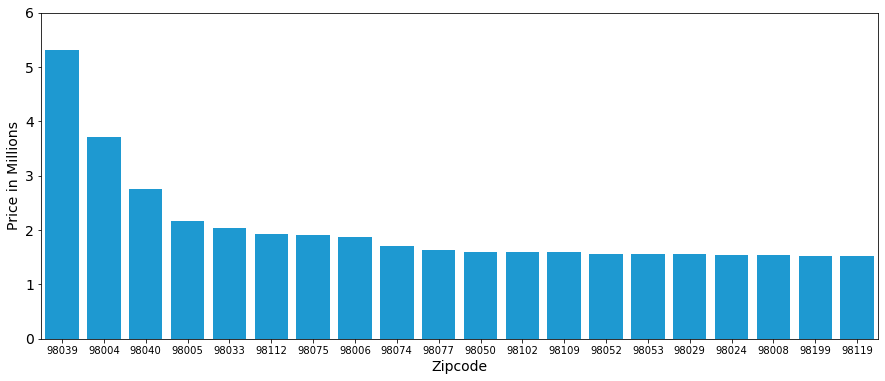

In [45]:
# bar chart of zipcodes by average price
zipcode_price = df[['price','zipcode']].groupby(by='zipcode')\
.mean().reset_index().sort_values(by='price')\
.nlargest(n=20, columns='price')

fig, ax = plt.subplots(figsize=(15,6))

sns.barplot(data=zipcode_price, x='zipcode', y='price', ax=ax, color='#00A4EF')
# plt.ticklabel_format(style='plain', axis='y',useOffset=False)
ax.set_xlabel('Zipcode', fontsize=14)
ax.set_ylabel('Price in Millions', fontsize=14)

# This changes the tick labels to show in millions (ex. 50,000,000 -> 50) 
y_tick_labels = ['{:,.0f}'.format(x) for x in ax.get_yticks()/1000000]
ax.set_yticks(ax.get_yticks().tolist())
ax.set_yticklabels(y_tick_labels)

# size of labels
ax.tick_params(axis='x', which='major', labelsize=10)
ax.tick_params(axis='y', which='major', labelsize=14);
plt.savefig('./vis/' + 'zipcodetoprice', bbox_inches='tight');

Now I'll look at relationships of variables with scatter plots

In [46]:
df.select_dtypes(exclude='object').drop(columns=['id', 'lat','long'])

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,logged_price,grade_num,condition_num,view_num,yr_renovated_yes_or_no,price_per_sqft
0,2022-05-24,675000,4,1.00,1180,7140,1.00,0,1180,0,0,40,1969,0,13.42,7,4,1,0,572.03
1,2021-12-13,920000,5,2.50,2770,6703,1.00,0,1570,1570,0,240,1950,0,13.73,7,3,3,0,332.13
2,2021-09-29,311000,6,2.00,2880,6156,1.00,0,1580,1580,0,0,1956,0,12.65,7,3,3,0,107.99
3,2021-12-14,775000,3,3.00,2160,1400,2.00,0,1090,1070,200,270,2010,0,13.56,9,3,3,0,358.80
4,2021-08-24,592500,2,2.00,1120,758,2.00,0,1120,550,550,30,2012,0,13.29,7,3,1,0,529.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,2021-11-30,1555000,5,2.00,1910,4000,1.50,0,1600,1130,0,210,1921,0,14.26,8,4,1,0,814.14
30151,2021-06-16,1313000,3,2.00,2020,5800,2.00,0,2020,0,0,520,2011,0,14.09,7,3,2,0,650.00
30152,2022-05-27,800000,3,2.00,1620,3600,1.00,0,940,920,240,110,1995,0,13.59,7,3,1,0,493.83
30153,2022-02-24,775000,3,2.50,2570,2889,2.00,0,1830,740,480,100,2006,0,13.56,8,3,1,0,301.56


In [47]:
# pair plots in seaborn
# sns.pairplot(data=df.select_dtypes(exclude='object').drop(columns=['id', 'lat','long']))

### Square Foot of Living Space Across Categorical Variables

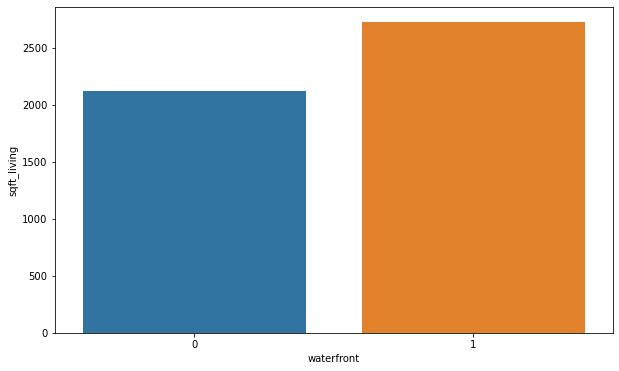

In [48]:
# average square foot of waterfront homes
waterfront_sqft = df[['sqft_living','waterfront']].groupby(by='waterfront')\
.mean().sort_values(by='sqft_living').reset_index()

fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(data=waterfront_sqft, x='waterfront', y='sqft_living', ax=ax)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)

<AxesSubplot:xlabel='view', ylabel='sqft_living'>

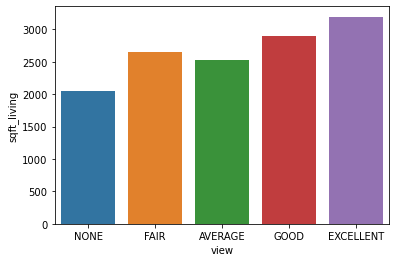

In [49]:
# Average square foot by view
view_sqft = df[['sqft_living', 'view', 'view_num']]\
.groupby(by='view').mean().reset_index().sort_values(by='view_num')

sns.barplot(data=view_sqft, x='view', y='sqft_living')

<AxesSubplot:xlabel='grade', ylabel='sqft_living'>

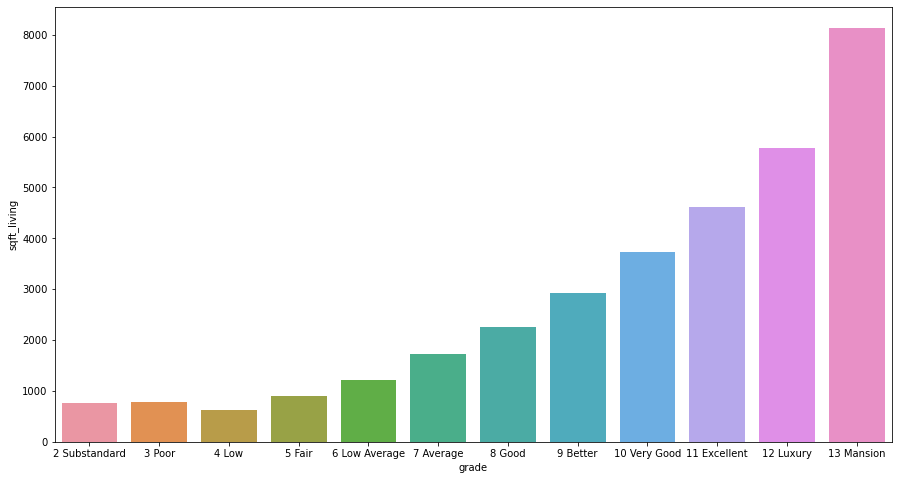

In [50]:
# Average square foot by grade
sqft_grade = df[['sqft_living', 'grade', 'grade_num']]\
.groupby(by='grade').mean().reset_index().sort_values(by='grade_num')

fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(data=sqft_grade, x='grade', y='sqft_living', ax=ax)

<AxesSubplot:xlabel='grade', ylabel='sqft_living'>

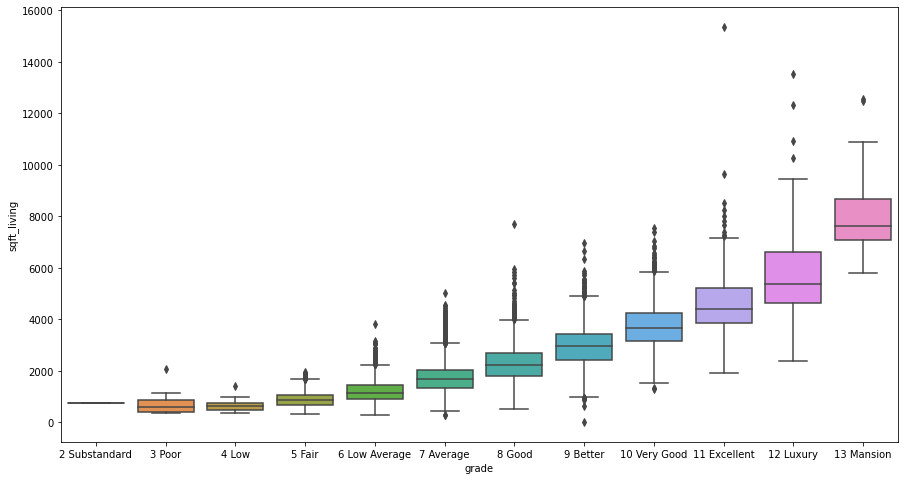

In [51]:
# box and whisker plot of sqft_living by grade
sqft_grade = df[['sqft_living', 'grade', 'grade_num']]\
.sort_values(by='grade_num')

# box and whisker plot
fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(data=sqft_grade, x='grade', y='sqft_living', ax=ax)

<AxesSubplot:xlabel='grade', ylabel='sqft_living'>

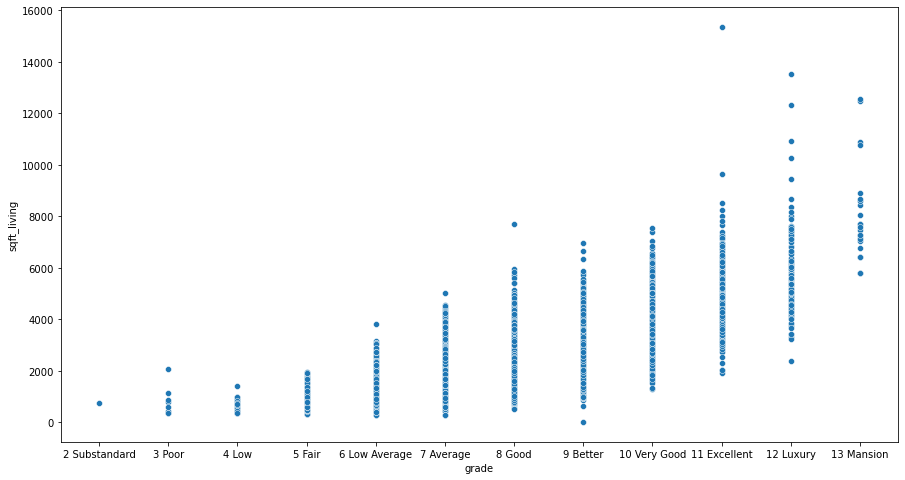

In [52]:
# Scatter plot average square foot and grade
sqft_grade = df[['sqft_living', 'grade', 'grade_num']]\
.sort_values(by='grade_num')

fig, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(data=sqft_grade, x='grade', y='sqft_living', ax=ax)

In [53]:
df.describe().price

count      29149.00
mean     1113428.96
std       895860.33
min        27360.00
25%       645000.00
50%       869000.00
75%      1310000.00
max     30750000.00
Name: price, dtype: float64

## Simple Linear Regression

In [54]:
# correlation table
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,...,yr_built,yr_renovated,lat,long,logged_price,grade_num,condition_num,view_num,yr_renovated_yes_or_no,price_per_sqft
id,1.00,-0.03,-0.01,-0.01,-0.03,-0.12,0.03,-0.04,-0.02,-0.02,...,0.02,-0.03,-0.00,0.01,-0.02,0.00,-0.01,-0.01,-0.01,-0.01
price,-0.03,1.00,0.29,0.49,0.62,0.09,0.20,0.24,0.55,0.25,...,0.11,0.09,0.30,0.08,0.83,0.58,-0.01,0.32,0.04,0.07
bedrooms,-0.01,0.29,1.00,0.59,0.63,0.00,0.20,-0.03,0.54,0.23,...,0.18,0.01,-0.02,0.13,0.35,0.39,0.02,0.05,0.02,-0.02
bathrooms,-0.01,0.49,0.59,1.00,0.78,0.04,0.43,0.05,0.68,0.26,...,0.46,0.04,0.05,0.18,0.52,0.65,-0.07,0.16,0.03,0.00
sqft_living,-0.03,0.62,0.63,0.78,1.00,0.12,0.36,0.08,0.88,0.34,...,0.33,0.04,0.05,0.23,0.62,0.74,-0.07,0.24,0.01,-0.02
sqft_lot,-0.12,0.09,0.00,0.04,0.12,1.00,-0.02,0.08,0.13,0.00,...,0.01,0.01,-0.07,0.18,0.08,0.06,-0.00,0.10,-0.00,0.04
floors,0.03,0.20,0.20,0.43,0.36,-0.02,1.00,0.00,0.51,-0.24,...,0.52,-0.02,0.05,0.09,0.26,0.47,-0.27,0.01,-0.04,0.00
waterfront,-0.04,0.24,-0.03,0.05,0.08,0.08,0.00,1.00,0.06,0.05,...,-0.04,0.10,-0.04,0.03,0.14,0.05,0.00,0.42,0.01,0.02
sqft_above,-0.02,0.55,0.54,0.68,0.88,0.13,0.51,0.06,1.00,-0.07,...,0.43,0.01,-0.02,0.34,0.55,0.72,-0.15,0.13,-0.02,-0.02
sqft_basement,-0.02,0.25,0.23,0.26,0.34,0.00,-0.24,0.05,-0.07,1.00,...,-0.23,0.05,0.19,-0.22,0.25,0.14,0.09,0.27,0.04,-0.00


In [55]:
# correlated to price
df.corr().price.sort_values()

id                       -0.03
condition_num            -0.01
yr_renovated_yes_or_no    0.04
price_per_sqft            0.07
long                      0.08
yr_renovated              0.09
sqft_lot                  0.09
yr_built                  0.11
floors                    0.20
waterfront                0.24
sqft_basement             0.25
sqft_garage               0.27
bedrooms                  0.29
lat                       0.30
sqft_patio                0.32
view_num                  0.32
bathrooms                 0.49
sqft_above                0.55
grade_num                 0.58
sqft_living               0.62
logged_price              0.83
price                     1.00
Name: price, dtype: float64

Most correlated variables to price are sqft_living, grade_num, sqft_above, bathrooms, sqft_patio, and view_num.

For our simple linear regression we are going to use sqft_living to predict price

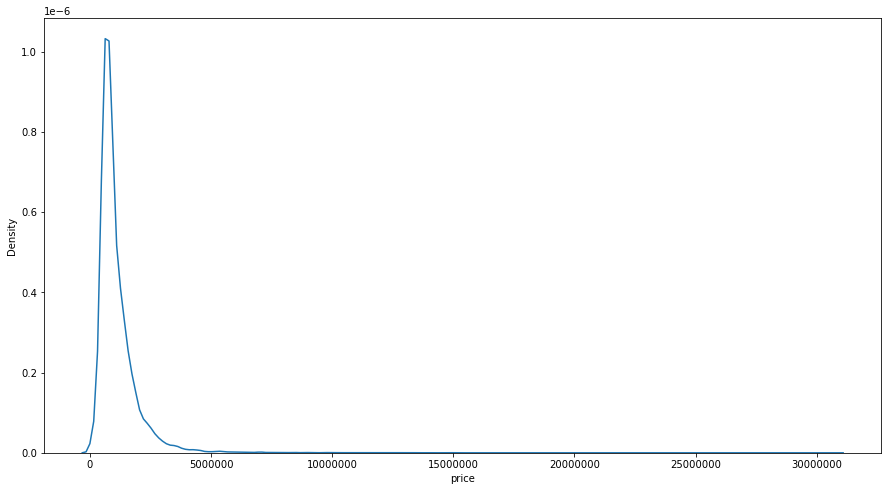

In [56]:
# distribution of price
fig, ax = plt.subplots(figsize=(15,8))

sns.kdeplot(data=df, x='price', ax=ax)
plt.ticklabel_format(style='plain', axis='x',useOffset=False)

### Model 1

In [57]:
# Setting up simple linear regression
X = df['sqft_living']
y = df['price']

# model
model = sm.OLS(endog=y, exog=sm.add_constant(X)).fit()
summary = model.summary()

In [58]:
# summary
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                 1.788e+04
Date:                Fri, 05 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:24:59   Log-Likelihood:            -4.3389e+05
No. Observations:               29149   AIC:                         8.678e+05
Df Residuals:                   29147   BIC:                         8.678e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.205e+04   9916.153     -9.283      0.000   -1.11e+05   -7.26e+04
sqft_living   565.4853      4.229    133.723      0.000     557.197     573.774
==============================================================================
Omnibus:                    42186.638   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         49954609.033
Skew:                           8.236   Prob(JB):                         0.00
Kurtosis:                     205.136   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The distribution of price is skewed right so to try and improve our linear regression model we are going to transform the price values by using a logarithm and square root to normalize the distribution.

### Model 2

In [59]:
# Change y to the log of y to work around skewness
X = df['sqft_living']
y = np.log(df['price'])

# model
model = sm.OLS(endog=y, exog=sm.add_constant(X)).fit()
summary = model.summary()

<AxesSubplot:xlabel='price', ylabel='Density'>

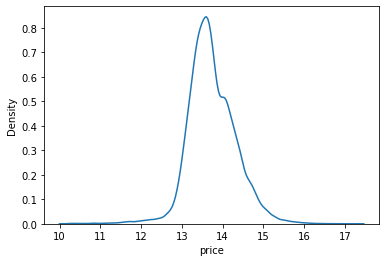

In [60]:
sns.kdeplot(data=y)

In [61]:
#summary
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                 1.865e+04
Date:                Fri, 05 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:24:59   Log-Likelihood:                -18545.
No. Observations:               29149   AIC:                         3.709e+04
Df Residuals:                   29147   BIC:                         3.711e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.9408      0.006   2013.231      0.000      12.928      12.953
sqft_living     0.0004   2.74e-06    136.548      0.000       0.000       0.000
==============================================================================
Omnibus:                     5812.232   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45556.724
Skew:                          -0.747   Prob(JB):                         0.00
Kurtosis:                       8.940   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model 3 - Baseline for Simple Linear Regression

In [62]:
# Change y to the square root of y to work around skewness
X = df['sqft_living']
y = np.sqrt(df['price'])

# model
model = sm.OLS(endog=y, exog=sm.add_constant(X)).fit()
summary = model.summary()

summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                 2.285e+04
Date:                Fri, 05 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:24:59   Log-Likelihood:            -2.0107e+05
No. Observations:               29149   AIC:                         4.022e+05
Df Residuals:                   29147   BIC:                         4.022e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         542.3970      3.370    160.961      0.000     535.792     549.002
sqft_living     0.2172      0.001    151.161      0.000       0.214       0.220
==============================================================================
Omnibus:                    12389.359   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           267145.120
Skew:                           1.533   Prob(JB):                         0.00
Kurtosis:                      17.510   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='price', ylabel='Density'>

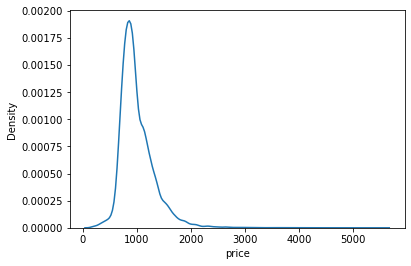

In [63]:
sns.kdeplot(data=y)

We achieved an R-squared of 0.439 in our square root of price model. This R-squared explains 43.9% of the variation of price. We are going to use this as our baseline model going forward.

## Multiple Linear Regression

In [64]:
# another look at our dataframe
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,address,lat,long,logged_price,grade_num,condition_num,view_num,yr_renovated_yes_or_no,zipcode,price_per_sqft
0,7399300360,2022-05-24,675000,4,1.00,1180,7140,1.00,0,NO,...,"2102 Southeast 21st Court, Renton, Washington ...",47.46,-122.19,13.42,7,4,1,0,98055,572.03
1,8910500230,2021-12-13,920000,5,2.50,2770,6703,1.00,0,NO,...,"11231 Greenwood Avenue North, Seattle, Washing...",47.71,-122.36,13.73,7,3,3,0,98133,332.13
2,1180000275,2021-09-29,311000,6,2.00,2880,6156,1.00,0,NO,...,"8504 South 113th Street, Seattle, Washington 9...",47.50,-122.23,12.65,7,3,3,0,98178,107.99
3,1604601802,2021-12-14,775000,3,3.00,2160,1400,2.00,0,NO,...,"4079 Letitia Avenue South, Seattle, Washington...",47.57,-122.29,13.56,9,3,3,0,98118,358.80
4,8562780790,2021-08-24,592500,2,2.00,1120,758,2.00,0,NO,...,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.53,-122.07,13.29,7,3,1,0,98027,529.02


In [65]:
# correlation to price
df.corr().price.sort_values()

id                       -0.03
condition_num            -0.01
yr_renovated_yes_or_no    0.04
price_per_sqft            0.07
long                      0.08
yr_renovated              0.09
sqft_lot                  0.09
yr_built                  0.11
floors                    0.20
waterfront                0.24
sqft_basement             0.25
sqft_garage               0.27
bedrooms                  0.29
lat                       0.30
sqft_patio                0.32
view_num                  0.32
bathrooms                 0.49
sqft_above                0.55
grade_num                 0.58
sqft_living               0.62
logged_price              0.83
price                     1.00
Name: price, dtype: float64

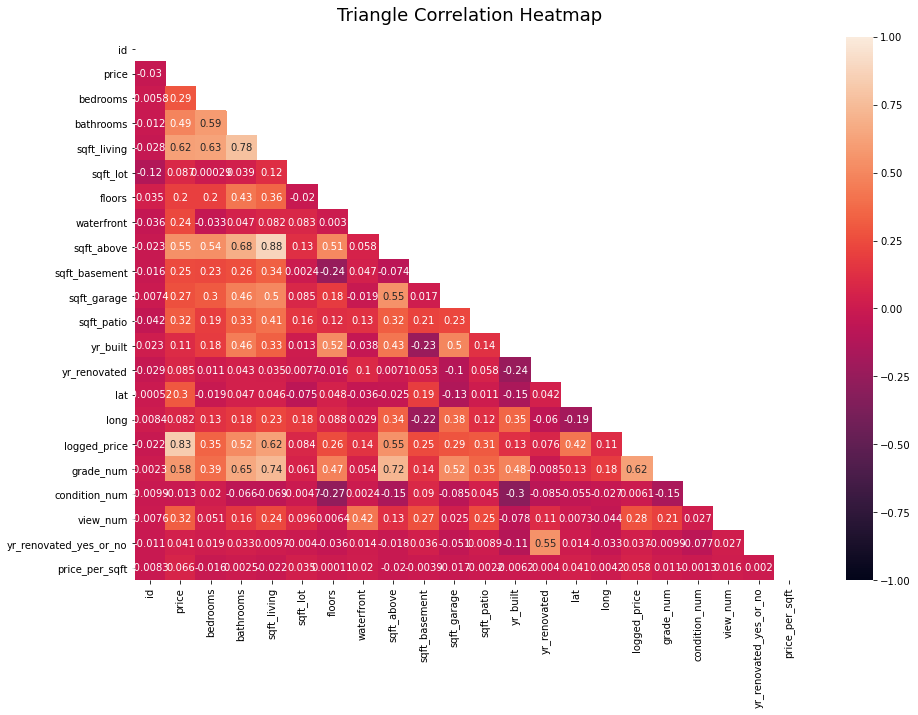

In [66]:
# correlation heat map
plt.figure(figsize=(15, 10))

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

Looking for multicollinearity.

sqft_above and sqft_living are highly correlated. For our regression we are going to use sqft_living.

### Model 1

In [67]:
# setting X and y variables
relevant_columns = ['sqft_living', 'bedrooms', 'bathrooms']
X = df[relevant_columns]
y = np.sqrt(df['price'])

In [68]:
model = sm.OLS(y, sm.add_constant(X)).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     8003.
Date:                Fri, 05 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:25:03   Log-Likelihood:            -2.0075e+05
No. Observations:               29149   AIC:                         4.015e+05
Df Residuals:                   29145   BIC:                         4.015e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         613.1682      5.227    117.314      0.000     602.924     623.413
sqft_living     0.2240      0.002     93.001      0.000       0.219       0.229
bedrooms      -45.8252      1.873    -24.465      0.000     -49.497     -42.154
bathrooms      31.0020      2.535     12.230      0.000      26.034      35.970
==============================================================================
Omnibus:                    11943.222   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           243979.060
Skew:                           1.473   Prob(JB):                         0.00
Kurtosis:                      16.864   Cond. No.                     9.15e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
model = LinearRegression()
model.fit(X,y)
model.score(X,y)

0.45169942373829

This model did not achieve a much higher R-squared score. Now we are going to add some categorical variables starting with waterfront

### Model 2

In [70]:
# waterfront dummy variable
relevant_columns = ['sqft_living', 'bathrooms', 'waterfront']
X = df[relevant_columns]
y = np.sqrt(df['price'])

In [71]:
# model
model = sm.OLS(y, sm.add_constant(X)).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     8294.
Date:                Fri, 05 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:25:03   Log-Likelihood:            -2.0052e+05
No. Observations:               29149   AIC:                         4.010e+05
Df Residuals:                   29145   BIC:                         4.011e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         528.0737      3.859    136.828      0.000     520.509     535.638
sqft_living     0.1990      0.002     88.140      0.000       0.195       0.203
bathrooms      20.1470      2.460      8.191      0.000      15.326      24.968
waterfront    344.7822     10.462     32.954      0.000     324.275     365.289
==============================================================================
Omnibus:                     9919.956   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           161945.604
Skew:                           1.201   Prob(JB):                         0.00
Kurtosis:                      14.295   Cond. No.                     1.78e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model 3

In [72]:
# modeling using zipcode as a dummy variable
X = df[['sqft_living', 'waterfront', 'zipcode']]
X = pd.get_dummies(X, columns=["zipcode"], drop_first=True)
y = np.sqrt(df["price"])

# model
model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     983.1
Date:                Fri, 05 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:25:03   Log-Likelihood:            -1.9083e+05
No. Observations:               29149   AIC:                         3.818e+05
Df Residuals:                   29071   BIC:                         3.825e+05
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           415.4496      7.139     58.192      0.000     401.456     429.443
sqft_living       0.1726      0.001    153.550      0.000       0.170       0.175
waterfront      356.6570      7.660     46.563      0.000     341.644     371.670
zipcode_98002    -5.2443     11.163     -0.470      0.638     -27.123      16.635
zipcode_98003     7.3705     10.515      0.701      0.483     -13.240      27.981
zipcode_98004   809.9865     11.697     69.246      0.000     787.059     832.914
zipcode_98005   526.7200     14.384     36.618      0.000     498.527     554.913
zipcode_98006   414.1888     10.043     41.242      0.000     394.504     433.874
zipcode_98007   369.6004     15.197     24.320      0.000     339.813     399.388
zipcode_98008   398.9247     10.845     36.785      0.000     377.668     420.181
zipcode_98010    14.0630     11.705      1.201      0.230      -8.880      37.006
zipcode_98011   252.8374     12.456     20.299      0.000     228.424     277.251
zipcode_98014   130.2835     15.122      8.616      0.000     100.644     159.923
zipcode_98019   154.4331     12.737     12.125      0.000     129.468     179.398
zipcode_98022    34.9819     10.400      3.364      0.001      14.597      55.367
zipcode_98023    -3.1200      9.316     -0.335      0.738     -21.379      15.139
zipcode_98024   298.8065     17.212     17.360      0.000     265.070     332.543
zipcode_98027   283.5139     10.989     25.799      0.000     261.974     305.054
zipcode_98028   211.1372     11.293     18.696      0.000     189.002     233.272
zipcode_98029   365.3110     11.618     31.444      0.000     342.539     388.083
zipcode_98030    18.9732     11.019      1.722      0.085      -2.624      40.571
zipcode_98031    26.3078      9.979      2.636      0.008       6.749      45.867
zipcode_98032    17.4696     14.172      1.233      0.218     -10.308      45.247
zipcode_98033   531.1352      9.643     55.078      0.000     512.234     550.037
zipcode_98034   322.4869      9.336     34.544      0.000     304.189     340.785
zipcode_98038    74.4725      8.892      8.375      0.000      57.043      91.902
zipcode_98039  1115.2820     23.084     48.315      0.000    1070.037    1160.527
zipcode_98040   589.0918     11.386     51.738      0.000     566.775     611.409
zipcode_98042    21.5108      8.633      2.492      0.013       4.590      38.432
zipcode_98045   156.9787     10.352     15.164      0.000     136.688     177.269
zipcode_98047     4.5886     20.402      0.225      0.822     -35.401      44.578
zipcode_98050   318.6732    119.588      2.665      0.008      84.276     553.070
zipcode_98051    92.5037     21.862      4.231      0.000      49.653     135.355
zipcode_98052   403.1202      9.804     41.116      0.000     383.903     422.337
zipcode_98053   332.4374     10.902     30.494   

In [73]:
# this is to check for multicollinearity
vif = pd.DataFrame({'variables':X.columns[1:], 
                    'VIF':[variance_inflation_factor(X.values, i+1) for i in range(len(X.columns[1:]))]})
vif.sort_values(by="VIF")

,variables,VIF
74,zipcode_98224,1.00
29,zipcode_98050,1.00
75,zipcode_98288,1.00
28,zipcode_98047,1.01
65,zipcode_98148,1.01
...,...,...
21,zipcode_98033,1.16
42,zipcode_98075,1.16
23,zipcode_98038,1.17
5,zipcode_98006,1.17


### Model 4 - Standardized to See Condition Number Properly

In [74]:
# Using standardscaler to transform independent variables
ss = StandardScaler()
ss.fit(X)
X = ss.transform(X)

In [75]:
# model after standardizing X
y = np.sqrt(df['price'])

model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     983.1
Date:                Fri, 05 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:25:36   Log-Likelihood:            -1.9083e+05
No. Observations:               29149   AIC:                         3.818e+05
Df Residuals:                   29071   BIC:                         3.825e+05
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1005.4661      0.989   1016.684      0.000    1003.528    1007.404
x1           168.6493      1.098    153.550      0.000     166.497     170.802
x2            47.1205      1.012     46.563      0.000      45.137      49.104
x3            -0.5816      1.238     -0.470      0.638      -3.008       1.845
x4             0.8987      1.282      0.701      0.483      -1.614       3.412
x5            84.6607      1.223     69.246      0.000      82.264      87.057
x6            41.0344      1.121     36.618      0.000      38.838      43.231
x7            55.1347      1.337     41.242      0.000      52.514      57.755
x8            26.7936      1.102     24.320      0.000      24.634      28.953
x9            46.2377      1.257     36.785      0.000      43.774      48.701
x10            1.4517      1.208      1.201      0.230      -0.917       3.820
x11           23.8175      1.173     20.299      0.000      21.518      26.117
x12            9.5055      1.103      8.616      0.000       7.343      11.668
x13           14.0987      1.163     12.125      0.000      11.820      16.378
x14            4.3457      1.292      3.364      0.001       1.813       6.878
x15           -0.4760      1.421     -0.335      0.738      -3.262       2.310
x16           18.6500      1.074     17.360      0.000      16.544      20.756
x17           32.2426      1.250     25.799      0.000      29.793      34.692
x18           22.9641      1.228     18.696      0.000      20.557      25.372
x19           38.1240      1.212     31.444      0.000      35.748      40.500
x20            2.1437      1.245      1.722      0.085      -0.296       4.584
x21            3.5150      1.333      2.636      0.008       0.902       6.128
x22            1.3836      1.122      1.233      0.218      -0.816       3.584
x23           75.9046      1.378     55.078      0.000      73.203      78.606
x24           48.9909      1.418     34.544      0.000      46.211      51.771
x25           12.5804      1.502      8.375      0.000       9.636      15.525
x26           50.1255      1.037     48.315      0.000      48.092      52.159
x27           64.0720      1.238     51.738      0.000      61.645      66.499
x28            3.9002      1.565      2.492      0.013       0.832       6.968
x29           19.6889      1.298     15.164      0.000      17.144      22.234
x30            0.2355      1.047      0.225      0.822      -1.817       2.288
x31            2.6396      0.991      2.665      0.008       0.698       4.581
x32            4.3967      1.039      4.231      0.000       2.360       6.433
x33           55.7216      1.355     41.116      0.000      53.065      58.378
x34           38.3395      1.257     30.494      0.000      35.875      40.804
x35            4.6501      1.145      4.062      0.000       2.406       6.894
x3

After standardizing our independent variables we double check our Condition Number to see if there is multicollinearity. Our new Condition Number is 8 which shows that there is very little multicollinearity in our model.

This model has achieved the highest R-squared value so far of 0.723. We are going to use this as a baseline and experiment with other variables with this model.

### Model 5

In [76]:
# modeling using grade as a dummy variable
X = df[['sqft_living', 'waterfront', 'grade']]
X = pd.get_dummies(X, columns=["grade"], drop_first=True)
y = np.sqrt(df["price"])

# Model
model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     2485.
Date:                Fri, 05 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:25:36   Log-Likelihood:            -1.9864e+05
No. Observations:               29149   AIC:                         3.973e+05
Df Residuals:                   29135   BIC:                         3.974e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1028.3585      9.615    106.959      0.000    1009.514    1047.203
sqft_living             0.1207      0.002     59.989      0.000       0.117       0.125
waterfront            315.2642      9.881     31.905      0.000     295.896     334.632
grade_11 Excellent    202.1357     12.666     15.960      0.000     177.311     226.961
grade_12 Luxury       381.7541     21.263     17.954      0.000     340.077     423.431
grade_13 Mansion      506.7121     46.282     10.948      0.000     415.998     597.426
grade_2 Substandard  -487.6587    220.654     -2.210      0.027    -920.151     -55.167
grade_3 Poor         -498.9477     74.007     -6.742      0.000    -644.005    -353.890
grade_4 Low          -425.4330     33.688    -12.629      0.000    -491.462    -359.404
grade_5 Fair         -408.0237     13.958    -29.231      0.000    -435.383    -380.665
grade_6 Low Average  -400.0239      8.879    -45.053      0.000    -417.427    -382.621
grade_7 Average      -354.1445      7.517    -47.115      0.000    -368.877    -339.412
grade_8 Good         -286.0895      7.097    -40.309      0.000    -300.001    -272.178
grade_9 Better       -149.8985      7.229    -20.735      0.000    -164.068    -135.729
==============================================================================
Omnibus:                    10088.096   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           174045.564
Skew:                           1.212   Prob(JB):                         0.00
Kurtosis:                      14.723   Cond. No.                     4.01e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.01e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model 6

In [77]:
# modeling using zipcode, waterfront, and grade as dummy variables
X = df[['sqft_living', 'waterfront', 'zipcode', 'grade']]
X = pd.get_dummies(X, columns=["zipcode",'grade'], drop_first=True)
y = np.sqrt(df["price"])

model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     951.9
Date:                Fri, 05 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:25:36   Log-Likelihood:            -1.8974e+05
No. Observations:               29149   AIC:                         3.797e+05
Df Residuals:                   29060   BIC:                         3.804e+05
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 679.2031      9.962     68.182      0.000     659.678     698.728
sqft_living             0.1259      0.002     81.883      0.000       0.123       0.129
waterfront            334.3943      7.432     44.996      0.000     319.828     348.961
zipcode_98002          -8.5543     10.781     -0.793      0.428     -29.685      12.577
zipcode_98003           2.3859     10.140      0.235      0.814     -17.489      22.261
zipcode_98004         757.3569     11.350     66.727      0.000     735.110     779.604
zipcode_98005         487.8560     13.891     35.120      0.000     460.629     515.083
zipcode_98006         370.7299      9.733     38.092      0.000     351.654     389.806
zipcode_98007         356.5367     14.655     24.329      0.000     327.812     385.261
zipcode_98008         388.9547     10.458     37.192      0.000     368.457     409.453
zipcode_98010          18.2883     11.303      1.618      0.106      -3.867      40.444
zipcode_98011         247.0490     12.011     20.568      0.000     223.507     270.591
zipcode_98014         122.0801     14.575      8.376      0.000      93.512     150.649
zipcode_98019         142.5067     12.286     11.599      0.000     118.425     166.588
zipcode_98022          29.5697     10.026      2.949      0.003       9.918      49.221
zipcode_98023         -16.3519      8.989     -1.819      0.069     -33.971       1.267
zipcode_98024         281.0557     16.600     16.931      0.000     248.519     313.592
zipcode_98027         258.0464     10.620     24.299      0.000     237.231     278.862
zipcode_98028         209.9203     10.890     19.277      0.000     188.576     231.265
zipcode_98029         320.7975     11.262     28.484      0.000     298.723     342.872
zipcode_98030          15.3589     10.620      1.446      0.148      -5.457      36.175
zipcode_98031          23.8934      9.623      2.483      0.013       5.032      42.755
zipcode_98032          13.1483     13.669      0.962      0.336     -13.643      39.939
zipcode_98033         500.4040      9.327     53.652      0.000     482.123     518.685
zipcode_98034         317.9160      9.009     35.287      0.000     300.257     335.575
zipcode_98038          71.2381      8.573      8.310      0.000      54.435      88.041
zipcode_98039        1045.5806     22.328     46.828      0.000    1001.817    1089.345
zipcode_98040         531.4389     11.063     48.039      0.000     509.756     553.122
zipcode_98042          17.9792      8.324      2.160      0.031       1.663      34.295
zipcode_98045         145.3980      9.991     14.553      0.000     125.816     164.980
zipcode_98047           3.5009     19.671      0.178      0.859     -35.055      42.057
zipcode_98050         317.5819    115.252      2.756      0.006      91.682     543.481
zip

In [78]:
# get our predicted y values
y_pred = model.predict(sm.add_constant(X))

# print MAE and RMSE
print(mean_absolute_error(y, y_pred))
print(mean_squared_error(y, y_pred, squared=False))


103.1060290853153
162.45341020331833


### Model 7

In [79]:
# modeling using zipcode, and yr_renovated as dummy variables
X = df[['sqft_living', 'waterfront', 'zipcode', 'yr_renovated_yes_or_no']]
X = pd.get_dummies(X, columns=["zipcode"], drop_first=True)
y = np.sqrt(df["price"])

# model
model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     973.2
Date:                Fri, 05 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:25:37   Log-Likelihood:            -1.9080e+05
No. Observations:               29149   AIC:                         3.818e+05
Df Residuals:                   29070   BIC:                         3.824e+05
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    415.4619      7.132     58.253      0.000     401.483     429.441
sqft_living                0.1725      0.001    153.550      0.000       0.170       0.175
waterfront               355.8924      7.653     46.506      0.000     340.893     370.892
yr_renovated_yes_or_no    63.9241      8.271      7.729      0.000      47.713      80.135
zipcode_98002             -6.4250     11.152     -0.576      0.565     -28.284      15.434
zipcode_98003              7.0741     10.505      0.673      0.501     -13.516      27.664
zipcode_98004            808.5488     11.687     69.184      0.000     785.642     831.456
zipcode_98005            526.4198     14.370     36.634      0.000     498.255     554.585
zipcode_98006            413.1610     10.034     41.177      0.000     393.494     432.828
zipcode_98007            368.2556     15.183     24.255      0.000     338.496     398.015
zipcode_98008            397.9768     10.835     36.732      0.000     376.741     419.213
zipcode_98010             14.2820     11.694      1.221      0.222      -8.638      37.202
zipcode_98011            252.2066     12.443     20.268      0.000     227.817     276.596
zipcode_98014            129.8365     15.107      8.595      0.000     100.227     159.446
zipcode_98019            154.7749     12.724     12.164      0.000     129.835     179.715
zipcode_98022             34.1467     10.390      3.286      0.001      13.781      54.512
zipcode_98023             -3.4509      9.306     -0.371      0.711     -21.692      14.790
zipcode_98024            299.2233     17.195     17.402      0.000     265.521     332.926
zipcode_98027            283.2249     10.978     25.799      0.000     261.707     304.743
zipcode_98028            210.9205     11.282     18.696      0.000     188.807     233.033
zipcode_98029            365.6808     11.606     31.507      0.000     342.932     388.430
zipcode_98030             18.7594     11.008      1.704      0.088      -2.816      40.335
zipcode_98031             26.2328      9.969      2.632      0.009       6.694      45.772
zipcode_98032             17.4039     14.157      1.229      0.219     -10.345      45.153
zipcode_98033            529.6165      9.636     54.965      0.000     510.730     548.503
zipcode_98034            322.3340      9.326     34.562      0.000     304.054     340.614
zipcode_98038             74.4420      8.884      8.380      0.000      57.030      91.854
zipcode_98039           1115.9120     23.060     48.391      0.000    1070.712    1161.112
zipcode_98040            588.7189     11.375     51.757      0.000     566.424     611.014
zipcode_98042             21.2418      8.624      2.463      0.014       4.338      38.146
zipcode_98045            156.6793     10.342     15.150      0.000     136.409  

### Model 8

In [80]:
# modeling using yr_renovated_yes_or_no as a dummy variable
X = df[['sqft_living', 'yr_renovated_yes_or_no']]
y = np.sqrt(df["price"])

# model
model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                 1.148e+04
Date:                Fri, 05 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:25:37   Log-Likelihood:            -2.0104e+05
No. Observations:               29149   AIC:                         4.021e+05
Df Residuals:                   29146   BIC:                         4.021e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    541.2650      3.369    160.659      0.000     534.661     547.868
sqft_living                0.2171      0.001    151.240      0.000       0.214       0.220
yr_renovated_yes_or_no    93.9212     11.699      8.028      0.000      70.990     116.852
==============================================================================
Omnibus:                    12351.562   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           264672.879
Skew:                           1.529   Prob(JB):                         0.00
Kurtosis:                      17.442   Cond. No.                     1.96e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Taking a look at outliers in prices

<AxesSubplot:xlabel='price', ylabel='Density'>

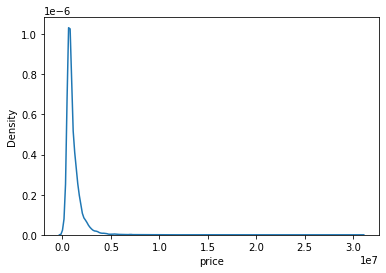

In [81]:
# price distribution
sns.kdeplot(data=df['price'])

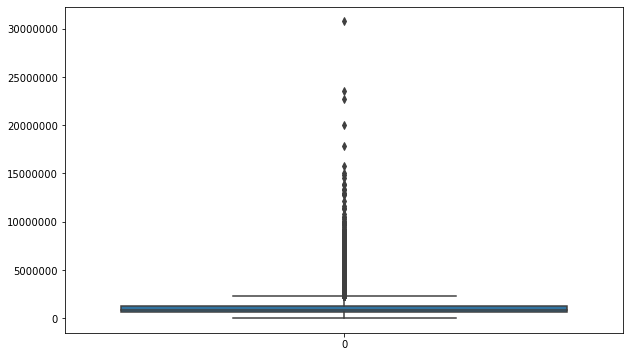

In [82]:
# box and whisker plot of price
fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(data=df['price'], ax=ax)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)

In [83]:
print(df['price'].mean())
print(df['price'].median())

1113428.9581117705
869000.0


Running our model on our dataframe filtered to prices less than 5,000,000

### Model 9

In [84]:
# setting X and y values
df1 = df[(df.price) < 5000000]

# modeling using zipcode waterfront, and grade as dummy variables
X = df1[['sqft_living', 'waterfront', 'zipcode', 'grade']]
X = pd.get_dummies(X, columns=["zipcode",'grade'], drop_first=True)
y = np.sqrt(df1["price"])

model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     933.9
Date:                Fri, 05 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:25:38   Log-Likelihood:            -1.8519e+05
No. Observations:               28946   AIC:                         3.706e+05
Df Residuals:                   28857   BIC:                         3.713e+05
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 694.0945      8.971     77.375      0.000     676.512     711.677
sqft_living             0.1222      0.001     87.346      0.000       0.119       0.125
waterfront            212.2925      7.208     29.453      0.000     198.165     226.420
zipcode_98002         -10.1032      9.644     -1.048      0.295     -29.005       8.799
zipcode_98003          -7.5420      9.083     -0.830      0.406     -25.345      10.261
zipcode_98004         662.7611     10.866     60.994      0.000     641.463     684.059
zipcode_98005         495.1432     12.455     39.754      0.000     470.731     519.556
zipcode_98006         374.1543      8.744     42.789      0.000     357.015     391.293
zipcode_98007         353.8827     13.109     26.995      0.000     328.188     379.577
zipcode_98008         386.6451      9.376     41.238      0.000     368.268     405.022
zipcode_98010          25.2935     10.112      2.501      0.012       5.473      45.114
zipcode_98011         246.1747     10.744     22.912      0.000     225.116     267.234
zipcode_98014         129.7068     13.039      9.948      0.000     104.150     155.263
zipcode_98019         141.6884     10.990     12.892      0.000     120.147     163.230
zipcode_98022          28.6787      8.969      3.198      0.001      11.100      46.258
zipcode_98023         -15.2643      8.041     -1.898      0.058     -31.025       0.497
zipcode_98024         212.8242     15.312     13.899      0.000     182.812     242.836
zipcode_98027         254.0584      9.523     26.678      0.000     235.393     272.724
zipcode_98028         208.4636      9.741     21.400      0.000     189.371     227.557
zipcode_98029         317.2873     10.105     31.399      0.000     297.481     337.093
zipcode_98030          12.8449      9.500      1.352      0.176      -5.776      31.465
zipcode_98031          20.9899      8.608      2.438      0.015       4.118      37.862
zipcode_98032          14.3288     12.227      1.172      0.241      -9.637      38.294
zipcode_98033         492.2133      8.368     58.823      0.000     475.812     508.614
zipcode_98034         308.9496      8.077     38.252      0.000     293.119     324.780
zipcode_98038          72.7728      7.669      9.490      0.000      57.742      87.804
zipcode_98039         910.0007     25.311     35.953      0.000     860.390     959.612
zipcode_98040         499.3796     10.121     49.340      0.000     479.542     519.218
zipcode_98042          16.4082      7.446      2.204      0.028       1.813      31.003
zipcode_98045         149.6024      8.937     16.739      0.000     132.085     167.120
zipcode_98047          -0.0231     17.596     -0.001      0.999     -34.512      34.466
zipcode_98050         319.6481    103.095      3.101      0.002     117.578     521.719
zip

This model does not perform much better than our baseline model

### Model 10

In [85]:
# adding year_built and renovated to model
# setting X and y values
# modeling using zipcode waterfront, and grade as dummy variables
X = df[['sqft_living', 'waterfront', 'zipcode', 'grade', 'yr_built']]
X = pd.get_dummies(X, columns=["zipcode",'grade'], drop_first=True)
y = np.sqrt(df["price"])

model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     949.5
Date:                Fri, 05 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:25:38   Log-Likelihood:            -1.8965e+05
No. Observations:               29149   AIC:                         3.795e+05
Df Residuals:                   29059   BIC:                         3.802e+05
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1823.9521     83.537     21.834      0.000    1660.215    1987.689
sqft_living             0.1241      0.002     80.761      0.000       0.121       0.127
waterfront            326.4378      7.430     43.936      0.000     311.875     341.001
yr_built               -0.5660      0.041    -13.801      0.000      -0.646      -0.486
zipcode_98002         -13.7209     10.752     -1.276      0.202     -34.796       7.354
zipcode_98003          -2.6176     10.114     -0.259      0.796     -22.441      17.206
zipcode_98004         745.4994     11.346     65.707      0.000     723.261     767.738
zipcode_98005         472.5654     13.890     34.021      0.000     445.340     499.791
zipcode_98006         358.8526      9.739     36.847      0.000     339.764     377.942
zipcode_98007         344.9583     14.631     23.576      0.000     316.280     373.637
zipcode_98008         376.5318     10.463     35.988      0.000     356.024     397.039
zipcode_98010          25.8262     11.280      2.290      0.022       3.717      47.936
zipcode_98011         242.6134     11.976     20.258      0.000     219.139     266.088
zipcode_98014         123.2291     14.528      8.482      0.000      94.753     151.705
zipcode_98019         145.4563     12.248     11.876      0.000     121.449     169.463
zipcode_98022          26.6553      9.996      2.667      0.008       7.063      46.248
zipcode_98023         -21.0091      8.966     -2.343      0.019     -38.584      -3.435
zipcode_98024         277.5045     16.548     16.770      0.000     245.070     309.939
zipcode_98027         252.0759     10.594     23.794      0.000     231.311     272.841
zipcode_98028         205.4121     10.859     18.916      0.000     184.127     226.697
zipcode_98029         318.4723     11.227     28.366      0.000     296.467     340.478
zipcode_98030          15.1112     10.586      1.428      0.153      -5.637      35.860
zipcode_98031          22.3872      9.592      2.334      0.020       3.586      41.189
zipcode_98032           5.4903     13.636      0.403      0.687     -21.236      32.217
zipcode_98033         494.0941      9.308     53.084      0.000     475.850     512.338
zipcode_98034         313.6808      8.985     34.910      0.000     296.069     331.293
zipcode_98038          76.1606      8.552      8.905      0.000      59.397      92.924
zipcode_98039        1031.1472     22.280     46.281      0.000     987.477    1074.817
zipcode_98040         515.5864     11.086     46.506      0.000     493.856     537.316
zipcode_98042          20.0656      8.299      2.418      0.016       3.800      36.331
zipcode_98045         147.6143      9.960     14.821      0.000     128.093     167.136
zipcode_98047          10.2490     19.613      0.523      0.601     -28.194      48.692
zip

### Model 11

In [86]:
# adding more features to our model
# setting X and y values
# modeling using zipcode waterfront, and grade as dummy variables
X = df[['sqft_living', 'waterfront', 'zipcode', 'grade', 'yr_renovated_yes_or_no',
       'yr_built', 'sqft_patio', 'sqft_basement', 'condition','view',
       'bathrooms', 'floors']]
X = pd.get_dummies(X, columns=["zipcode",'grade', 'condition', 'view'], drop_first=True)
y = np.sqrt(df["price"])

model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     890.5
Date:                Fri, 05 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:25:39   Log-Likelihood:            -1.8885e+05
No. Observations:               29149   AIC:                         3.779e+05
Df Residuals:                   29046   BIC:                         3.788e+05
Df Model:                         102                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1234.6001     96.382     12.809      0.000    1045.688    1423.512
sqft_living                0.1183      0.002     57.280      0.000       0.114       0.122
waterfront               194.3094      8.459     22.969      0.000     177.728     210.890
yr_renovated_yes_or_no    72.6718      7.918      9.178      0.000      57.153      88.191
yr_built                  -0.2566      0.048     -5.295      0.000      -0.352      -0.162
sqft_patio                 0.0240      0.004      5.603      0.000       0.016       0.032
sqft_basement             -0.0284      0.002    -12.900      0.000      -0.033      -0.024
bathrooms                 15.1892      1.856      8.185      0.000      11.552      18.827
floors                   -18.7874      2.581     -7.278      0.000     -23.847     -13.728
zipcode_98002            -16.2547     10.482     -1.551      0.121     -36.801       4.291
zipcode_98003             -8.9214      9.857     -0.905      0.365     -28.243      10.400
zipcode_98004            750.7109     11.063     67.856      0.000     729.026     772.395
zipcode_98005            464.1989     13.553     34.251      0.000     437.635     490.763
zipcode_98006            350.5806      9.510     36.865      0.000     331.941     369.220
zipcode_98007            349.1289     14.249     24.502      0.000     321.200     377.058
zipcode_98008            365.2362     10.208     35.779      0.000     345.228     385.245
zipcode_98010             22.9649     10.993      2.089      0.037       1.419      44.511
zipcode_98011            251.7878     11.664     21.588      0.000     228.927     274.649
zipcode_98014            125.9780     14.149      8.903      0.000      98.245     153.711
zipcode_98019            152.3404     11.925     12.775      0.000     128.966     175.715
zipcode_98022              5.9024      9.770      0.604      0.546     -13.247      25.052
zipcode_98023            -22.0443      8.744     -2.521      0.012     -39.182      -4.906
zipcode_98024            275.3952     16.145     17.057      0.000     243.750     307.041
zipcode_98027            250.2780     10.337     24.213      0.000     230.018     270.538
zipcode_98028            213.8029     10.582     20.204      0.000     193.061     234.545
zipcode_98029            327.0284     10.942     29.888      0.000     305.582     348.475
zipcode_98030             10.9983     10.314      1.066      0.286      -9.218      31.214
zipcode_98031             23.2530      9.343      2.489      0.013       4.941      41.565
zipcode_98032             10.2485     13.284      0.772      0.440     -15.788      36.285
zipcode_98033            498.3621      9.069     54.952      0.000     480.586     516.138
zipcode_98034            312.4652      8.761     35.665      0.000     295.293  

This model did produce a much higher R-squared value than our baseline. We are going to use sqft_living, waterfront, zipcode, grade, and view in a new model.

### Model 12 - Final Model Before Train-Test Split

In [87]:
# modeling using zipcode waterfront, and grade as dummy variables
X = df[['sqft_living', 'waterfront', 'zipcode', 'grade', 'view']]
X = pd.get_dummies(X, columns=["zipcode",'grade', 'view'], drop_first=True)
y = np.sqrt(df["price"])

model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     954.3
Date:                Fri, 05 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:25:39   Log-Likelihood:            -1.8923e+05
No. Observations:               29149   AIC:                         3.786e+05
Df Residuals:                   29056   BIC:                         3.794e+05
Df Model:                          92                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 727.5718     10.586     68.732      0.000     706.823     748.320
sqft_living             0.1205      0.002     79.109      0.000       0.118       0.123
waterfront            197.5367      8.546     23.115      0.000     180.786     214.287
zipcode_98002          -7.9364     10.594     -0.749      0.454     -28.701      12.828
zipcode_98003          -3.1362      9.970     -0.315      0.753     -22.677      16.405
zipcode_98004         757.4722     11.158     67.887      0.000     735.602     779.342
zipcode_98005         484.6066     13.652     35.498      0.000     457.849     511.365
zipcode_98006         360.7420      9.569     37.699      0.000     341.986     379.498
zipcode_98007         360.9688     14.402     25.064      0.000     332.740     389.197
zipcode_98008         378.2731     10.283     36.786      0.000     358.118     398.428
zipcode_98010          18.7543     11.110      1.688      0.091      -3.021      40.530
zipcode_98011         250.0948     11.803     21.189      0.000     226.960     273.229
zipcode_98014         125.5327     14.325      8.763      0.000      97.455     153.611
zipcode_98019         145.2014     12.073     12.027      0.000     121.537     168.866
zipcode_98022          14.5787      9.888      1.474      0.140      -4.802      33.959
zipcode_98023         -16.3658      8.835     -1.852      0.064     -33.683       0.952
zipcode_98024         288.1605     16.318     17.659      0.000     256.176     320.145
zipcode_98027         257.1942     10.436     24.644      0.000     236.738     277.650
zipcode_98028         208.6091     10.702     19.493      0.000     187.633     229.585
zipcode_98029         321.3341     11.067     29.034      0.000     299.641     343.027
zipcode_98030          15.9345     10.436      1.527      0.127      -4.520      36.389
zipcode_98031          25.2172      9.456      2.667      0.008       6.683      43.752
zipcode_98032          13.6382     13.432      1.015      0.310     -12.689      39.965
zipcode_98033         502.0354      9.167     54.767      0.000     484.068     520.003
zipcode_98034         313.9070      8.854     35.452      0.000     296.552     331.262
zipcode_98038          74.5312      8.425      8.846      0.000      58.018      91.045
zipcode_98039        1038.6489     21.942     47.335      0.000     995.641    1081.657
zipcode_98040         522.2110     10.895     47.933      0.000     500.857     543.565
zipcode_98042          19.2696      8.180      2.356      0.018       3.236      35.304
zipcode_98045         146.9204      9.824     14.956      0.000     127.666     166.175
zipcode_98047           2.8765     19.330      0.149      0.882     -35.011      40.764
zipcode_98050         286.1205    113.284      2.526      0.012      64.078     508.163
zip

In [88]:
# Performance Metrics
y_pred = model.predict(sm.add_constant(X))

print(mean_absolute_error(y, y_pred) ** 2)
print(mean_squared_error(y, y_pred, squared=True))

10248.867572763704
25479.46912364533


### Final Model Description

It is important to note for this model we transformed the price of homes to be the square root of the price of homes. We did this to normalize the distribution of price because it is originally skewed right. We experimented with transforming it to the log of price but we ultimately found the square root of the price to work better for our model.

Our final model includes the following features: square foot of living space, zip code, whether it is a waterfront property, grade of construction, and view. Square foot of living space is the only continuous variable in our model. Waterfront was the only binary categorical variable in our model. For the rest of the features we transformed them into dummy variables.

Our model has a p-value of the f-statistic of close to 0 which means we can reject the null hypothesis of our model having no significance in predicting the price of a home. We achieved an R-squared value of 0.751 which means our model explains about 75% of the variation in price using our features. The mean absolute error and mean squared error after squaring them are 10,248.87 and 25,479.47 respectively. This means our model on average has a margin of error of about $10,248 when predicting home prices.

## Train-Test Split

We are going to use our Model 12 to do Train-Test Split on the data

In [89]:
# defining X and y
X = df[['sqft_living', 'waterfront', 'zipcode', 'grade', 'view']]
X = pd.get_dummies(X, columns=["zipcode",'grade', 'view'], drop_first=True)
y = np.sqrt(df["price"])

In [90]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [91]:
# set up Linear Regression
lr = LinearRegression()

In [92]:
# fit model
lr.fit(X_train, y_train)

LinearRegression()

In [93]:
# metrics
y_pred = lr.predict(X_train)

print(lr.score(X_train, y_train))
print(mean_absolute_error(y_train, y_pred) ** 2)
print(mean_squared_error(y_train, y_pred, squared=True))

0.756680418994128
10300.427206058244
25127.025774041045


Our training model MAE is about 10,307 dollars which means are margin of error for predicting a house is 10,307 dollars in either direction. Our RMSE is 26,239 dollars.

Now to predict on our X_test and evaluate based on y_test

In [94]:
# metrics
y_pred = lr.predict(X_test)

print(mean_absolute_error(y_test, y_pred) ** 2)
print(mean_squared_error(y_test, y_pred, squared=True))

10246.84743743615
26532.387207777574


Our test showed a slight increase in MAE and a decrease in our RMSE.

### Testing our model with example data

In [95]:
# test data
data = {
    'sqft_living': 2000,
    'waterfront': 0, 
    'zipcode_98002': 0,
    'zipcode_98003': 0,
    'zipcode_98004': 0,
    'zipcode_98005': 0,
    'zipcode_98006': 0, 
    'zipcode_98007': 0,
    'zipcode_98008': 0,
    'zipcode_98010': 0,
    'zipcode_98011': 0, 
    'zipcode_98014': 0,
    'zipcode_98019': 0, 
    'zipcode_98022': 0, 
    'zipcode_98023': 0, 
    'zipcode_98024': 0,
    'zipcode_98027': 0,
    'zipcode_98028': 0, 
    'zipcode_98029': 0, 
    'zipcode_98030': 0,
    'zipcode_98031': 0, 
    'zipcode_98032': 0, 
    'zipcode_98033': 0, 
    'zipcode_98034': 0,
    'zipcode_98038': 0, 
    'zipcode_98039': 0, 
    'zipcode_98040': 0, 
    'zipcode_98042': 0,
    'zipcode_98045': 0, 
    'zipcode_98047': 0, 
    'zipcode_98050': 0, 
    'zipcode_98051': 0,
    'zipcode_98052': 0, 
    'zipcode_98053': 0, 
    'zipcode_98055': 0, 
    'zipcode_98056': 0,
    'zipcode_98057': 0, 
    'zipcode_98058': 0, 
    'zipcode_98059': 0, 
    'zipcode_98065': 0,
    'zipcode_98070': 0, 
    'zipcode_98072': 0, 
    'zipcode_98074': 0, 
    'zipcode_98075': 0,
    'zipcode_98077': 0, 
    'zipcode_98092': 0, 
    'zipcode_98102': 0, 
    'zipcode_98103': 0,
    'zipcode_98105': 0, 
    'zipcode_98106': 0,
    'zipcode_98107': 0, 
    'zipcode_98108': 0,
    'zipcode_98109': 0, 
    'zipcode_98112': 0, 
    'zipcode_98115': 0, 
    'zipcode_98116': 0,
    'zipcode_98117': 0, 
    'zipcode_98118': 0, 
    'zipcode_98119': 0, 
    'zipcode_98122': 0,
    'zipcode_98125': 0, 
    'zipcode_98126': 0, 
    'zipcode_98133': 0, 
    'zipcode_98136': 0,
    'zipcode_98144': 0, 
    'zipcode_98146': 0, 
    'zipcode_98148': 0, 
    'zipcode_98155': 0,
    'zipcode_98166': 0, 
    'zipcode_98168': 0, 
    'zipcode_98177': 0, 
    'zipcode_98178': 0,
    'zipcode_98188': 0, 
    'zipcode_98198': 1, 
    'zipcode_98199': 0, 
    'zipcode_98224': 0,
    'zipcode_98288': 0, 
    'grade_11 Excellent': 0, 
    'grade_12 Luxury': 0,
    'grade_13 Mansion': 0, 
    'grade_2 Substandard': 0, 
    'grade_3 Poor': 0,
    'grade_4 Low': 1, 
    'grade_5 Fair': 0, 
    'grade_6 Low Average': 0, 
    'grade_7 Average': 0,
    'grade_8 Good': 0, 
    'grade_9 Better': 0, 
    'view_EXCELLENT': 0, 
    'view_FAIR': 0,
    'view_GOOD': 1, 
    'view_NONE': 0
    }

In [96]:
# convert dictionary to np series
data = pd.Series(data)

# extract values from data
data_values = data.values

# convert to a 2D array
data_values = data_values.reshape(1,-1)

# predict housing price based on data inputs
print(round(float(lr.predict(data_values) ** 2), ndigits=2))

603126.67


Our model predicts this house would cost $478,695.25

### Function to input data to predict

Create a function to input paramaters and it will return the predicted house price.

In [97]:
# paramaters to enter 'sqft_living', 'waterfront', 'zipcode', 'grade', 'view'

def house_price(sqft_living, waterfront, zipcode, grade, view):
    '''
    Enter the following parameters sqft_living, waterfront, zipcode,
    grade, and view and the function will return the predicted housing
    price. The grade and view parameters need to match the categorical 
    values from the df dataframe.
    '''
    # dictionary keys
    dict_keys = list(model.params.index[1:])

    # create dictionary
    params_dictionary = { param : None for param in dict_keys }

    # assign paramaters to dictionary
    params_dictionary['sqft_living'] = sqft_living
    params_dictionary['waterfront'] = waterfront

    # for loop to check zipcode
    for key in params_dictionary.keys():
        if 'zipcode' in key:
            if zipcode in key:
                params_dictionary[key] = 1
            else:
                params_dictionary[key] = 0

    # for loop to check grade      
    for key in params_dictionary.keys():
        if 'grade' in key:
            if grade.lower() in key.lower():
                params_dictionary[key] = 1
            else:
                params_dictionary[key] = 0    

    # for loop to check grade      
    for key in params_dictionary.keys():
        if 'view' in key:
            if view.lower() in key.lower():
                params_dictionary[key] = 1
            else:
                params_dictionary[key] = 0  
                
    # convert dictionary to np series
    data = pd.Series(params_dictionary)

    # extract values from data
    data_values = data.values
    
    # convert to a 2D array
    data_values = data_values.reshape(1,-1)
    
    # square the predicted value to get the house price in dollars
    return (round(float(lr.predict(data_values) ** 2), ndigits=2))


In [98]:
# test out the function

house_price(2000, 0, '98198', '4 Low', 'GOOD')

603126.67

Function prints out the same housing price as the previous test cells.

In [99]:
df['zipcode'].unique()[2]

'98178'

In [100]:
# Run a for loop to display housing prices for each
# zipcode for similar houses
for zipcode in list(df['zipcode'].unique()):
    print(tuple([zipcode, house_price(2000, 0, zipcode, '4 Low', 'GOOD')]))

('98055', 646691.63)
('98133', 845766.73)
('98178', 661849.51)
('98118', 813010.35)
('98027', 1040098.3)
('98166', 718456.25)
('98030', 590768.88)
('98023', 545742.24)
('98019', 817361.47)
('98144', 966952.87)
('98031', 601364.02)
('98092', 551864.95)
('98103', 1102309.68)
('98006', 1266652.6)
('98136', 963456.49)
('98007', 1255831.2)
('98038', 696569.47)
('98057', 651615.85)
('98077', 1058575.12)
('98126', 848382.82)
('98053', 1156826.51)
('98039', 3245491.46)
('98107', 1081320.33)
('98008', 1285533.48)
('98155', 912815.57)
('98168', 611325.82)
('98199', 1163526.34)
('98004', 2353001.88)
('98045', 819059.13)
('98052', 1279759.28)
('98011', 1022661.84)
('98002', 557321.18)
('98033', 1575539.85)
('98116', 1007194.54)
('98198', 603126.67)
('98125', 906129.77)
('98001', 569824.46)
('98112', 1360115.52)
('98034', 1137530.64)
('98056', 816882.72)
('98059', 837573.54)
('98005', 1532294.84)
('98040', 1631513.44)
('98014', 778118.69)
('98106', 741808.77)
('98029', 1173511.85)
('98122', 1055988

### Finding zipcodes to meet business objectives

We are looking for zipcodes which have an average living space square foot between 1900 and 2300 or about an average of 2100. From there we also want to see which zipcodes have a lot of "Good" views. Then we will see the average grades of the remaining zipcodes.

In [101]:
# data frame containing average sqft_living and zipcode
sqft_zip = df[['zipcode', 'sqft_living']].groupby(by='zipcode').mean().\
sort_values(by='sqft_living').reset_index()

In [102]:
# filter the data frame by 1900-2300 average sqft
filter1 = sqft_zip['sqft_living'] >= 1900
filter2 = sqft_zip['sqft_living'] <= 2300

# filter for zipcodes and list of the zipcodes we need
filtered_zipcodes = sqft_zip.loc[filter1 & filter2].zipcode.values

In [103]:
len(filtered_zipcodes)

22

In [104]:
# filter dataframe to only show filtered_zipcodes
df_filtered = df.loc[df['zipcode'].isin(filtered_zipcodes)].copy()

# filter for "Good" views or view_num == 4
view_filter = df_filtered['view_num'] == 4

# filter dataframe
df_filtered = df_filtered.loc[view_filter].copy()

# count zipcodes with most good views
view_zipcode = df_filtered[['zipcode', 'view']].groupby(by='zipcode').count().\
reset_index().sort_values(by='view').copy()

# filter by more than 9 good views
view_zipcodes = view_zipcode.loc[view_zipcode['view'] >= 10].zipcode.values

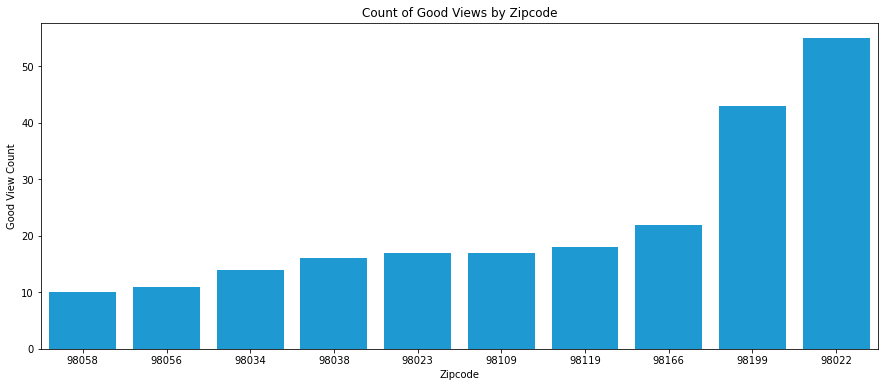

In [105]:
# bar chart of the zipcodes we found with most views
fig, ax = plt.subplots(figsize=(15,6))

# bar chart
sns.barplot(data=view_zipcode[view_zipcode['view'] >=10], x='zipcode',
           y='view', color='#00A4EF', ax=ax)
ax.set_xlabel("Zipcode")
ax.set_ylabel("Good View Count")
ax.set_title("Count of Good Views by Zipcode")

# save plot as jpg
plt.savefig('./vis/' + './count_of_good_views', bbox_inches='tight')

We have a our list of zipcodes that have an average living square feet between 1900 and 2300 and have a lot of homes with Good views. Now we are going to see what grade of homes are in each zipcode.

In [106]:
# set max rows
pd.set_option("display.max_rows", None, "display.max_columns", None)

# filter dataframe by view_zipcode
df_filtered = df.loc[df['zipcode'].isin(view_zipcodes)].copy()

# group by zipcode and then grade and then count
df_filtered = df_filtered[['zipcode', 'grade','grade_num']].groupby(by=['zipcode', 'grade'])\
.count().reset_index().copy()

# # only show the relevant grades
relevant_grade =['2 Substandard', '3 Poor', '4 Low', '5 Fair', '6 Low Average']
df_filtered = df_filtered.loc[df_filtered['grade'].isin(relevant_grade)].copy()

# get the final list of the zipcodes we are going to use
final_zipcodes = df_filtered.zipcode.value_counts()
final_zipcodes = final_zipcodes[final_zipcodes > 1].index

In [107]:
df_filtered.groupby(by='zipcode').sum().reset_index()\
.sort_values(by='grade_num')

,zipcode,grade_num
6,98109,2
7,98119,5
2,98034,9
9,98199,27
3,98038,61
5,98058,71
1,98023,79
8,98166,79
4,98056,92
0,98022,100


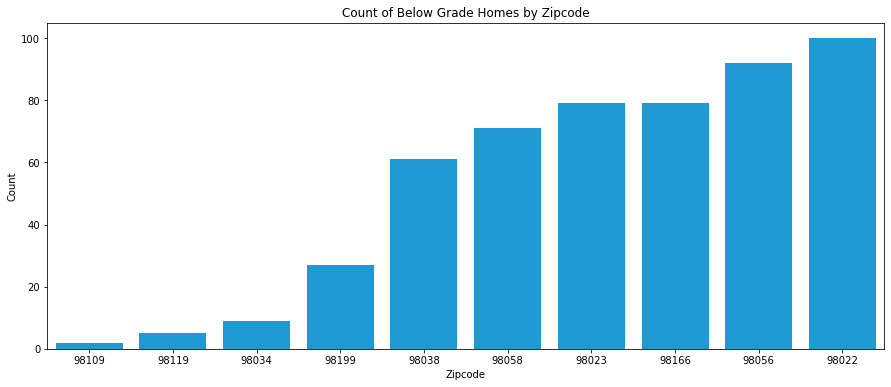

In [108]:
# bar chart of the zipcodes we found with most Low Average 
# below grades
fig, ax = plt.subplots(figsize=(15,6))

# bar chart
sns.barplot(data=df_filtered.groupby(by='zipcode').sum().reset_index()\
                .sort_values(by='grade_num'), 
            x='zipcode',
            y='grade_num', color='#00A4EF', ax=ax)

ax.set_xlabel("Zipcode")
ax.set_ylabel("Count")
ax.set_title("Count of Below Grade Homes by Zipcode")

# save plot as jpg
plt.savefig('./vis/' + './count_of_below_grade_home', bbox_inches='tight')

In [109]:
month_labels = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'June', 7: 'July', 8: 'Aug',
                9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

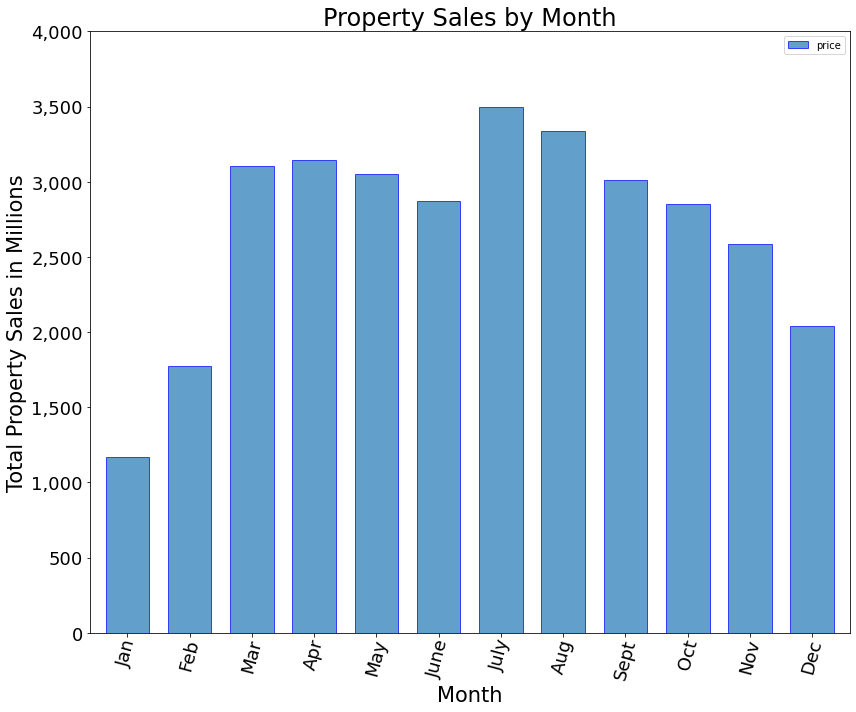

<Figure size 432x288 with 0 Axes>

In [110]:
price_time = pd.DataFrame(df.groupby('date')['price'].sum())
price_time['month']=price_time.index.month
price_month = pd.DataFrame(price_time.groupby('month')['price'].sum())
price_month.reset_index().month.map(month_labels)
price_month['price'].apply(lambda x: x/10**6).sort_values(ascending=True)
price_month = price_month.reset_index()
price_month['month_name'] = price_month.month.map(month_labels)
#define the figure
fig,ax = plt.subplots()

# use a white background and other settings 
plt.rcParams['axes.facecolor'] = 'white'
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.tick_params(axis='x', colors='black', pad =.2)
ax.grid(color='grey', linestyle='-.', linewidth=1, alpha=0.4)

# plot data in price_month
price_month.plot(kind='bar',x='month_name',y='price', figsize=(12,10), width = .7, alpha = .7, edgecolor = 'blue', ax=ax)
    
# labelling around the graph
plt.xlabel('Month', fontsize = 21)
plt.ylabel('Total Property Sales in Millions', fontsize = 21)
plt.xticks(rotation=75,fontsize=18)
plt.yticks(fontsize=18)
ax.set_facecolor('white')
plt.title('Property Sales by Month', fontsize = 24, loc ='center')
y_tick_labels = ['{:,.0f}'.format(x) for x in ax.get_yticks()/1000000]
ax.set_yticks(ax.get_yticks().tolist())
ax.set_yticklabels(y_tick_labels)
plt.tight_layout()
plt.show()
plt.savefig('./vis/' + 'salesbymonth', bbox_inches='tight');

### Run these final zipcodes into our model

In [111]:
final_zipcodes

Index(['98038', '98056', '98166', '98022', '98058', '98023', '98199'], dtype='object')

In [112]:
# predicted prices for these zipcodes 
# 2100 sqft on average and grade of 6 Low Average
for zipcode in final_zipcodes:
    print(tuple([zipcode, house_price(2100, 0, zipcode, '6 Low Average', 'GOOD')]))

('98038', 822015.14)
('98056', 952300.34)
('98166', 845776.56)
('98022', 709956.17)
('98058', 786875.54)
('98023', 657375.26)
('98199', 1324137.89)


In [113]:
# predicted prices for these zipcodes 
# 2100 sqft on average and grade of 5 Fair
for zipcode in final_zipcodes:
    print(tuple([zipcode, house_price(2100, 0, zipcode, '5 Fair', 'GOOD')]))

('98038', 825896.93)
('98056', 956478.11)
('98166', 849714.0)
('98022', 713564.02)
('98058', 790673.57)
('98023', 660847.11)
('98199', 1329063.4)


## Recommendations

Based on our findings for the zipcodes they could be interested in, we have narrowed down 3 zipcodes that could be useful to them based on their budget and other business objectives.

The 3 zipcodes we recommend are 98023, 98022, and 98199.

    * For the 98023 zipcode, this would be a good option for a cheap home in an upcoming neighborhood outside of Seattle.
    
    * For the 98022 zipcode, this gives you scenic views of Mt. Rainier. The negative being this is outside of Seattle and             could limit the amount of people coming to see your model home.
    
    * For the 98199 zipcode, located in the heart of Seattle this is a prime location for gathering investors with views of           Elliot Bay and Seattle proper